In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/sample_data/citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('name',axis=1))

StandardScaler()

In [9]:
scaled_features=scaler.transform(df.drop('name',axis=1))

In [10]:
new_dataset=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
new_dataset

,name,diameter,weight,red,green
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [13]:
from sklearn.model_selection import train_test_split
X=new_dataset
Y=df['name']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,Y_train)
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [19]:
ped=knn.predict(X_test)


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(Y_test,ped))
print(classification_report(Y_test,ped))

[[1315  148]
 [ 159 1378]]
              precision    recall  f1-score   support

  grapefruit       0.89      0.90      0.90      1463
      orange       0.90      0.90      0.90      1537

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [29]:
error_rate=[]

for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  ped_i=knn.predict(X_test)
  error_rate.append(np.mean(ped_i !=Y_test))

Text(0, 0.5, 'Error rate')

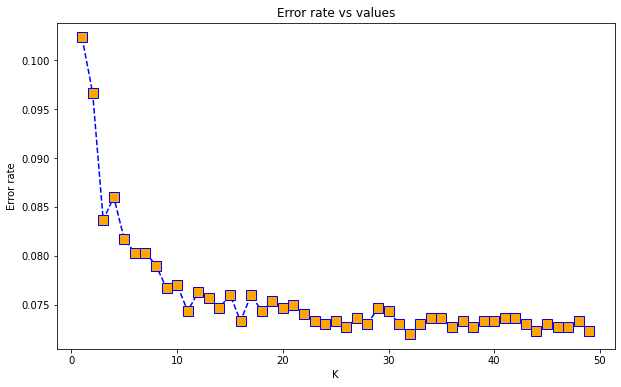

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='s',markerfacecolor='orange',markersize=10)
plt.title('Error rate vs values')
plt.xlabel('K')
plt.ylabel('Error rate')

In [31]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
ped=knn.predict(X_test)
print(confusion_matrix(Y_test,ped))
print(classification_report(Y_test,ped))

[[1348  115]
 [ 136 1401]]
              precision    recall  f1-score   support

  grapefruit       0.91      0.92      0.91      1463
      orange       0.92      0.91      0.92      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

